<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Practice_Repo/blob/main/Unet_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 폐 이미지 영역 분할
https://www.kaggle.com/code/nikhilpandey360/lung-segmentation-from-chest-x-ray-dataset/notebook

## 폐 이미지 데이터 다운로드

In [1]:
!rm -rf Lung_Segmentation.zip
!wget https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/Lung_Segmentation.zip

--2023-02-01 14:04:00--  https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/Lung_Segmentation.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/Lung_Segmentation.zip [following]
--2023-02-01 14:04:00--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/Lung_Segmentation.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37648324 (36M) [application/zip]
Saving to: ‘Lung_Segmentation.zip’

Lung_Segmentation.z 100%[===================>]  35.90M  --.-KB/s    in 0.1s    

2023-02-01 14:04:03 (248 MB/s) -

In [2]:
!rm -rf Lung_Segmentation
!unzip Lung_Segmentation.zip

Archive:  Lung_Segmentation.zip
   creating: Lung_Segmentation/
   creating: Lung_Segmentation/image/
  inflating: Lung_Segmentation/image/CHNCXR_0001_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0002_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0003_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0004_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0005_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0006_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0007_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0008_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0009_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0010_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0011_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0012_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0013_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0014_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0015_0.png  
  inflating: Lung_Segmentation/image/CHNCXR

## 이미지 파일 보기

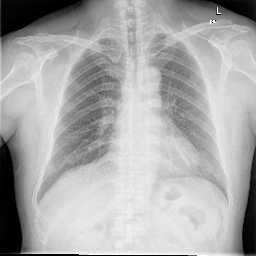

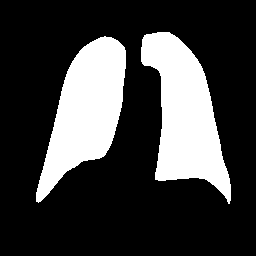

In [3]:
from IPython.display import Image, display

display(Image('./Lung_Segmentation/image/CHNCXR_0001_0.png'))
display(Image('./Lung_Segmentation/label/CHNCXR_0001_0.png'))

## 데이터 로딩

In [4]:
import numpy as np
import os

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [7]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

data_path = 'Lung_Segmentation'
files = os.listdir(os.path.join(data_path, 'image'))

In [12]:
raw_x = []
raw_y = []
for file_name in files:
    input_file = os.path.join(data_path, 'image', file_name)
    output_file = os.path.join(data_path, 'label', file_name)

    image = imread(input_file)[:, :, :IMG_CHANNELS]
    
    label = imread(output_file)             # label.shape = (256, 256)
    label = np.expand_dims(label, axis=-1)  # label.shape = (256, 256, 1)

    raw_x.append(image)
    raw_y.append(label)

raw_x = np.array(raw_x)
raw_y = np.array(raw_y)

In [13]:
print(raw_x[0])
print(raw_y[0])

[[[ 44  44  44]
  [ 44  44  44]
  [ 46  46  46]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 42  42  42]
  [ 37  37  37]
  [ 41  41  41]
  ...
  [ 83  83  83]
  [ 86  86  86]
  [ 86  86  86]]

 [[ 38  38  38]
  [ 38  38  38]
  [ 30  30  30]
  ...
  [ 83  83  83]
  [ 87  87  87]
  [ 85  85  85]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [101 101 101]
  [101 101 101]
  [ 97  97  97]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [125 125 125]
  [127 127 127]
  [127 127 127]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [164 164 164]
  [167 167 167]
  [164 164 164]]]
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


## 데이터 정규화


In [14]:
x = (raw_x / 255).astype(np.float)
y = (raw_y / 255).astype(np.int)

<ipython-input-14-84a901469fd6>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = (raw_x / 255).astype(np.float)
<ipython-input-14-84a901469fd6>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (raw_y / 255).astype(

In [15]:
print(np.min(x), np.max(x))
print(np.min(y), np.max(y))

0.0 1.0
0 1


## 데이터셋 나누기

In [16]:
split_index = int(x.shape[0] * 0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [17]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(452, 256, 256, 3)
(452, 256, 256, 1)
(114, 256, 256, 3)
(114, 256, 256, 1)


In [19]:
import matplotlib.pyplot as plt

def plotTrainData(x, y, set_type):
    print(set_type)
    for i in range(3):
        idx = np.random.randint(0, len(x))
        plt.subplot(1, 2, 1)
        plt.imshow(x[idx])

        plt.subplot(1, 2, 2)
        plt.imshow(np.squeeze(y[idx]), 'gray') # (256, 256, 1)을 (256, 256)으로 변환
        plt.show()

train


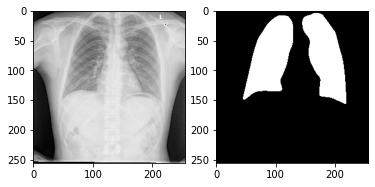

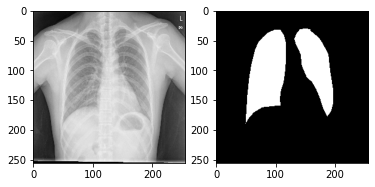

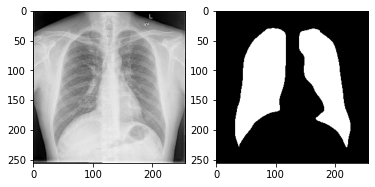

test


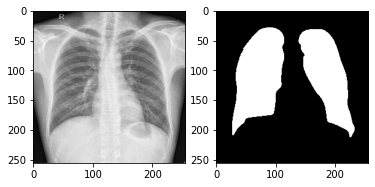

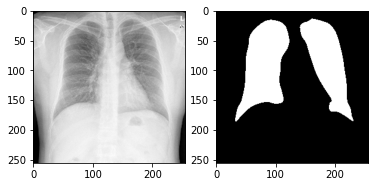

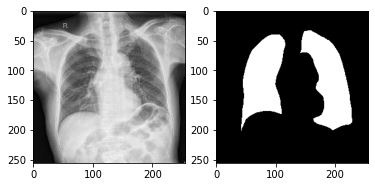

In [20]:
plotTrainData(train_x, train_y, 'train')
plotTrainData(test_x, test_y, 'test')

## U-Net 모델 정의

In [23]:
from keras import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Conv2DTranspose, concatenate
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [24]:
def unet(input_size=(256,256,3)):
    inputs = Input(input_size)

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    
    up = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up, conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    
    up = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up, conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    
    up = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up, conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    
    up = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up, conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

## 모델 생성

In [25]:
model = unet()

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [26]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# 학습
history = model.fit(train_x, train_y, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
12/12 [==============================] - 41s 2s/step - loss: 0.3602 - accuracy: 0.8605 - val_loss: 0.6181 - val_accuracy: 0.7511
Epoch 2/100
12/12 [==============================] - 8s 639ms/step - loss: 0.1320 - accuracy: 0.9695 - val_loss: 0.5871 - val_accuracy: 0.7486
Epoch 3/100
12/12 [==============================] - 8s 650ms/step - loss: 0.1011 - accuracy: 0.9753 - val_loss: 0.8431 - val_accuracy: 0.7511
Epoch 4/100
12/12 [==============================] - 8s 642ms/step - loss: 0.0850 - accuracy: 0.9780 - val_loss: 0.5877 - val_accuracy: 0.7511
Epoch 5/100
12/12 [==============================] - 8s 650ms/step - loss: 0.0783 - accuracy: 0.9782 - val_loss: 0.7107 - val_accuracy: 0.7511
Epoch 6/100
12/12 [==============================] - 8s 656ms/step - loss: 0.0696 - accuracy: 0.9795 - val_loss: 0.9008 - val_accuracy: 0.7511
Epoch 7/100
12/12 [==============================] - 8s 656ms/step - loss: 0.0671 - accuracy: 0.9793 - val_loss: 1.0237 - val_accuracy: 0.7511
E

## Loss와 정확도 그려보기

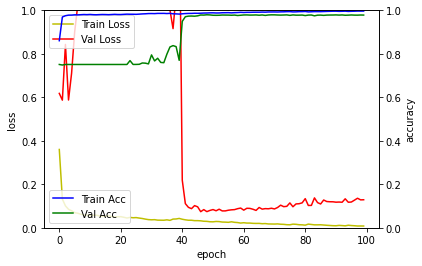

In [33]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='Train Loss')
loss_ax.plot(history.history['val_loss'], 'r', label='Val Loss')
loss_ax.set_ylim([0.0, 1.0])

acc_ax.plot(history.history['accuracy'], 'b', label='Train Acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='Val Acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## 결과 보기

In [34]:
import matplotlib.pyplot as plt

def plotPredictions(model, train_x, train_y, test_x, test_y):
    idx = np.random.randint(0, len(train_x))

    input = train_x[idx:idx+1]
    mask = train_y[idx:idx+1]

    preds_train = model.predict(input)
    preds_train_t = (preds_train > 0.5).astype(np.uint8)

    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 3, 1)
    plt.title('X_train')
    plt.axis('off')
    plt.imshow(input[0])
    
    plt.subplot(1, 3, 2)
    plt.title('Y_train')
    plt.axis('off')
    plt.imshow(mask[0][:, :, 0], 'gray')
    
    plt.subplot(1, 3, 3)
    ret = model.evaluate(input, mask)
    plt.title(f'Prediction: {ret[1]:.4f}')
    plt.axis('off')
    plt.imshow(preds_train_t[0][:, :, 0], 'gray')
    plt.show()

    idx = np.random.randint(0, len(test_x))

    input = test_x[idx:idx+1]
    mask = test_y[idx:idx+1]

    preds_test = model.predict(input)
    preds_test_t = (preds_test > 0.5).astype(np.uint8)

    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 3, 1)
    plt.title('X_test')
    plt.axis('off')
    plt.imshow(input[0])
    
    plt.subplot(1, 3, 2)
    plt.title('Y_test')
    plt.axis('off')
    plt.imshow(mask[0][:, :, 0], 'gray')
    
    plt.subplot(1, 3, 3)
    ret = model.evaluate(input, mask)
    plt.title(f'Prediction: {ret[1]:.4f}')
    plt.axis('off')
    plt.imshow(preds_test_t[0][:, :, 0], 'gray')
    plt.show()

1/1 [==============================] - 0s 44ms/step - loss: 0.0087 - accuracy: 0.9966


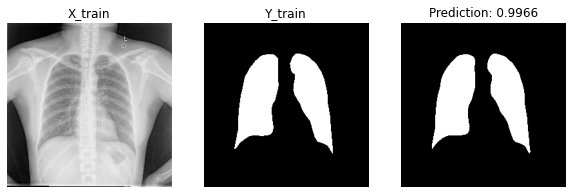

1/1 [==============================] - 0s 30ms/step - loss: 0.0782 - accuracy: 0.9834


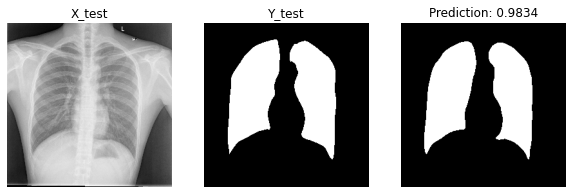

In [35]:
plotPredictions(model, train_x, train_y, test_x, test_y)